# Finite Size Scaling

## Figure 3

Investigate the finite size scaling of $S_2(n=1)-\ln(N)$ vs $N^{-(4g+1)}$ for $N=2\to 14$ and $V/t = -1.3 \to 1.8$.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def g(V):
    '''Interaction parameter g.'''
    K = np.pi/np.arccos(-V/2)/2
    return (K+1/K)/4-1/2

### Interaction strengths and boundary conditions

In [3]:
V = [1.8,1.4,1.0,0.6,0.2,-0.1,-0.5,-0.9,-1.3]
BC = ['APBC','PBC']

## Load the data and perform the linear fit for each BC and interaction strength

In [4]:
S2scaled = {}
for cBC in BC:
    for cV in V:
        
        # load raw data
        data = np.loadtxt('N1%sn1u_%3.1f.dat'%(cBC[0],cV))

        # Raises each N to the power of the leading finite size correction γ=(4g+1)
        x = data[:,0]**(-(1.0+4*g(cV)))
        
        # perform the linear fit
        p = np.polyfit(x,data[:,3],1)
        
        # rescale the data
        y = (data[:,3]-p[1])/p[0]

        # store
        S2scaled['%s%3.1f'%(cBC[0],cV)] = np.stack((x,y),axis=1)

## Plot the scaled finite-size data collapse

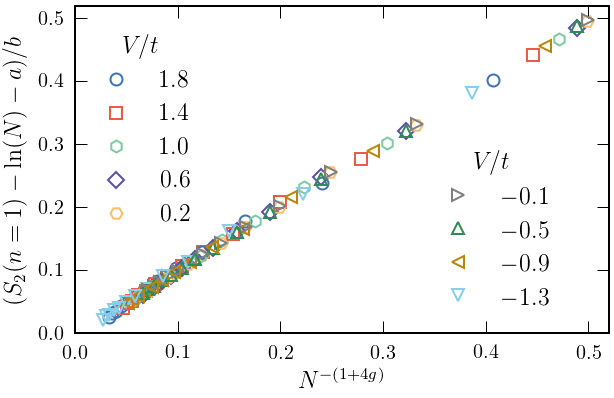

In [24]:
colors = ['#4173b3','#e95c47','#7dcba4','#5e4ea2','#fdbe6e','#808080','#2e8b57','#b8860b','#87ceeb']
markers = ['o','s','h','D','H','>','^','<','v']

plt.style.reload_library()
with plt.style.context('../IOP_large.mplstyle'):
    
    # Create the figure
    fig1 = plt.figure()
    ax2 = fig1.add_subplot(111)
    ax3 = fig1.add_subplot(111)
    ax2.set_xlabel(r'$N^{-(1+4g)}$')
    ax2.set_ylabel(r'$(S_2(n=1)-{\rm{ln}}(N)-a)/b$')
    ax2.set_xlim(0,0.52)
    ax2.set_ylim(0,0.52)
    ax3 = ax2.twinx()
    ax3.set_xlim(0,0.52)
    ax3.set_ylim(0,0.52)
    ax1 = fig1.add_subplot(111)
    ax1.set_xlim(0,0.52)
    ax1.set_ylim(0,0.52)
    

    # Plots (S2(n=1)-ln(N)-a)/b vs. N^-(4g+1) 
    # anti-periodic boundary conditions
    for i,cV in enumerate(V):
        data = S2scaled['A%3.1f'%cV]
        if cV > 0:
            ax = ax2
        else:
            ax = ax3
            
        ax.plot(data[:,0],data[:,1], marker=markers[i], color=colors[i], mfc='None', mew='1.0', 
                linestyle='None', label=r'$%3.1f$'%cV)
    
    # U/t > 0 legend
    ax2.legend(loc=(0.01,0.29),frameon=False,numpoints=1,ncol=1,title=r'$V/t$')
    
    
    # periodic boundary conditions  
    for i,cV in enumerate(V): 
        data = S2scaled['P%3.1f'%cV]

        ax1.plot(data[:,0],data[:,1], marker=markers[i], color=colors[i], mfc='None', mew=1.0,
                 linestyle='None', label='None')

    # U/t < 0 legend
    ax3.legend(loc=(0.65,0.04),frameon=False,numpoints=1,ncol=1,title=r'$V/t$')
    ax3.tick_params(
       axis='both',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelright='off') # labels along the bottom edge are off
    ax2.tick_params(
       axis='both',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       right='on',
       top='on')         # ticks along the top edge are off
    
    # Save the figure
    plt.savefig('finiteSizeScaling.pdf')
    plt.savefig('finiteSizeScaling.png')